# Data Analysis with python for King County house sale


This project focuses on determining market price of houses with given set of features.
will use data analysis techniques to anaylze and predict house prices by using set of features such as number of floors,square footage and so on. 

 This is a Regression problem since we estimating house prices which we know estimating prices result to continuous values (Target)   

# Step 1

Let's import all needed libraries

In [3]:
import pandas as pd

In [4]:
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

In [8]:
from sklearn.linear_model import Ridge

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.pipeline import Pipeline

#  Step 2: load data

In [12]:
df=pd.read_csv(r"C:\Users\Student\Downloads\kc_house_data.csv\kc_house_data.csv")

In [18]:
#Let view the data
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# step 3: Data cleaning

Let us do data cleaning by handling missing values, check data types and remove unwanted columns 

In [19]:
df.isnull()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21609,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21610,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21611,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
#just because dataframe consist of large dataset let us try to summarize it

In [28]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [29]:
#we can confirm there are no missing values or null values

In [36]:
df.duplicated().sum()

0

In [38]:
#there were no duplicated values in this data set

In [39]:
#Now let check data types

In [37]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [42]:
#let drop "id" column it won't help us on analysing a data

In [38]:
df.drop("id",axis=1,inplace=True)

In [39]:
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Step 3: Exploratory Data Analysis (EDA)
let perform EDA to gain deep understanding of variables

In [40]:
#use describe method to find summarized info for numerical data
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [41]:
#let show our columns
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [50]:
#let us count how many values for each floor

In [42]:
floor_count=df["floors"].value_counts()
floor_count

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

In [53]:
#convert it to dataframe

In [43]:
floor_count.to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


# Data Visualization

let us visualize using seaborn and matplot libaries for boxplot as we trying to determine whether houses with waterfront view have more prices ouliers or not

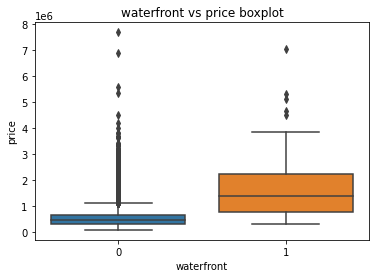

In [64]:
sns.boxplot(x=df["waterfront"],y=df["price"],data=df)
plt.title("waterfront vs price boxplot")
plt.show()

Now let use regression plot from matplotlib and seaborn libraries. we want to determine if square-footage-above has positive or negative correlation with the price

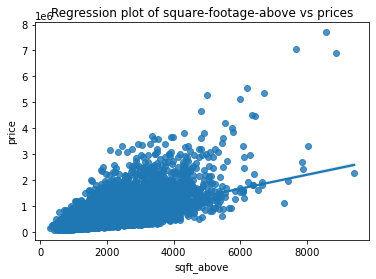

In [15]:
sns.regplot(x=df["sqft_above"],y=df["price"],data=df)
plt.title("Regression plot of square-footage-above vs prices")
plt.show()

In [66]:
#with this regression plot we can confirm square-footage-above have postive correlation with the price therefore we square-footage-above feature can be used as prediction fixture
#note: It is a weak correlation which likely not used as feature for predictions

# STEP 4: Model deployment 
Since we performed regression plot and that plot had positive correlation then we can assume these features has linear relationship and of which means we can use linear regression model

In [17]:
#Let deploy linear regression

In [18]:
model=LinearRegression()

In [19]:
#let us set our features (x) and target (y)

In [20]:
x=df[["sqft_living"]]

In [21]:
y=df["price"]

In [22]:
#Let fit the model
model.fit(x,y)

LinearRegression()

In [23]:
model.score(x,y)

0.4928532179037931

In [24]:
#our predictions after using sqft_living feature has score of 49.29 %

Now let us use these list of features and predict house prices 

In [25]:
X=df[["bedrooms","bathrooms","sqft_living","floors","waterfront","view","grade","sqft_above","sqft_basement","lat","sqft_living15"]]

In [26]:
Y=df["price"]

In [27]:
model.fit(X,Y)

LinearRegression()

In [28]:
model.score(X,Y)

0.6577040809946026

In [29]:
#our features gave us prediction score of 65.77 percent

Let create pipepline object using previous features so we predict prices and calclate R^2

In [30]:
Input=[("scaler",StandardScaler()),("polynomial",PolynomialFeatures(include_bias=False)),("model",LinearRegression())]

In [31]:
pipeline=Pipeline(Input)

In [32]:
pipeline.fit(X,Y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [33]:
pipeline.score(X,Y)

0.7513464456503663

In [34]:
# after creating pipeline object we have prediction score of 75.13 percent

# Step 5:Model Evaluation and Refinement
Let split our data into training and testing sets

In [ ]:
#Remember our features (X) and target (Y) we used in previous question, we still using it

In [48]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

 Let create and fit Ridge regression object using training data, then we set regularization parameter (alpha) to 0.1 and then calculate R^2 or prediction score using test data

In [50]:
ridge=Ridge(alpha=0.1)

In [51]:
ridge.fit(X_train,Y_train)

Ridge(alpha=0.1)

In [52]:
ridge.score(X_test,Y_test)

0.6442112822840411

In [53]:
#Our R^2 after using Ridge regression  is 64.4

Now let perform Second Order polynomial transform on both training and testing data. Then we create and fit Ridge regression object using training data setting regularization parameter (alpha) to 0.1, and Calculate R^2 using the test data 

In [58]:
pr=PolynomialFeatures(degree=2)

In [68]:
X_train_pr=pr.fit_transform(X_train[["bedrooms","bathrooms","sqft_living","floors","waterfront","view","grade","sqft_above","sqft_basement","lat","sqft_living15"]])

In [69]:
X_test_pr=pr.fit_transform(X_test[["bedrooms","bathrooms","sqft_living","floors","waterfront","view","grade","sqft_above","sqft_basement","lat","sqft_living15"]])

In [71]:
MODEL=Ridge(alpha=0.1)

In [72]:
MODEL.fit(X_train_pr,Y_train)

Ridge(alpha=0.1)

In [73]:
MODEL.score(X_test_pr,Y_test)

0.7307389015999668

# Conclusion
- we Used visulization such as boxplot to gain understanding of data and learn outliers
- Regression plot was good to plot a line which show correlaton of dependent and independent varibles
- In conclusion after model deployment, using one feature or less features for fit and prediction is not enough as it resulting on less score percentage for prediction
- We created Pipeline object to chain together multiple data preprocessing steps in a single object. And it helped us to increase score predictions as it reduces chances of underfitting by ensuring that it includes enough data preprocessing  steps to capture the relevant features in data 
- We used Ridge Regression to reduce risk of overfitting  by setting regularization parameter to 0.1, these helps model to learn simplier model which reduce risk of overfitting